In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import olx
import cPickle as pickle

# Download and save data (optional)

In [116]:
tc = olx.olxChecker('motoryzacja/samochody/nissan/almera')

In [ ]:
ofrs = tc.getAllOffers()

In [ ]:
offrs_dtls = []
for i, offer in enumerate(ofrs):
    print i
    if offer[0] == 'www.olx.pl':
        offrs_dtls += [tc.getOfferDetail(offer[1])]

In [ ]:
with open('data_er5.pkl', 'w') as f:
    pickle.dump((ofrs,offrs_dtls), f)

# Load data

In [3]:
with open('data_mondeo.pkl', 'r') as f:
    ofrs, offrs_dtls = pickle.load(f)

# Analysis

In [114]:
def by_year_stats(filters=None,names=None,min_count=0):
    price_by_year = {}
    if filters is None:
        filters = [lambda x: True]
        names = ['All']
    assert len(filters) == len(names)
    for offer in offrs_dtls:
        if 'Rok produkcji' in offer['details']:
            rp = offer['details']['Rok produkcji']
            if rp not in price_by_year:
                price_by_year[rp] = [[] for _ in xrange(len(filters))]
            for i, fltr in enumerate(filters):
                if fltr(offer):        
                    price_by_year[rp][i] += [offer['price']]
    years = []
    counts = [[] for _ in xrange(len(filters))]
    means = [[] for _ in xrange(len(filters))]
    stdevs = [[] for _ in xrange(len(filters))]
    for year in sorted(price_by_year.keys()):
        years += [int(year)]
        for i in xrange(len(filters)):
            counts[i] += [len(price_by_year[year][i])]
            if counts[i][-1] == 0:
                means[i] += [0]
                stdevs[i] += [0]
            else:
                means[i] += [numpy.mean(price_by_year[year][i])]
                stdevs[i] += [numpy.std(price_by_year[year][i])]
    years = np.array(years)
    counts = np.array(counts)
    means = np.array(means)
    stdevs = np.array(stdevs)
    mask = (counts >= min_count).all(axis=0) 

    figsize(7,12)
    subplot(211)
    title('Count of offers by year')
    for i,name in enumerate(names):
        plot(years[mask], counts[i][mask], label=name)
    if len(names) > 1:
        legend()
    subplot(212)
    title('Mean of offers by year')
    for i,name in enumerate(names):
        plot(years[mask], means[i][mask], label=name)
        if len(names) == 1:
            errorbar(years[mask], means[i][mask], yerr=stdevs[i][mask], alpha=0.3)
    if len(names) > 1:
        legend()
    
    head = ['Rok']
    for i,name in enumerate(names):
        head += ['Ilość', name]
    print " | ".join(head)
    for j,y in enumerate(years):
        row = [str(y)]
        for i,_ in enumerate(names):
            row += [str(counts[i][j]),str(means[i][j])]
        print " ".join(row)
    figsize(7,7)
    
def find_by_type(path):
    types = {}
    for ofr in offrs_dtls:
        ctype = ofr
        for p in path:
            try:
                ctype = ctype[p]
            except:
                ctype = 'N/A'
                break
        types[ctype] = types.get(ctype, 0) + 1
    items = types.items()
    for i in argsort(types.values()):
        print u"{}: {}".format(items[i][0], items[i][1])
    

Rok | Ilość | All
1993 1 1350.0
1994 2 1400.0
1995 1 1000.0
1996 4 1419.75
1997 8 1781.25
1998 10 2019.9
1999 7 1942.85714286
2000 5 2519.6
2001 29 4842.27586207
2002 29 5714.17241379
2003 23 5263.17391304
2004 17 7614.70588235
2005 7 6871.42857143
2006 14 9828.5
2007 10 20715.0
2008 9 22076.6666667
2009 7 27671.4285714
2010 5 30380.0
2011 2 28850.0
2012 2 32200.0
2013 2 47999.5
2014 1 76000.0


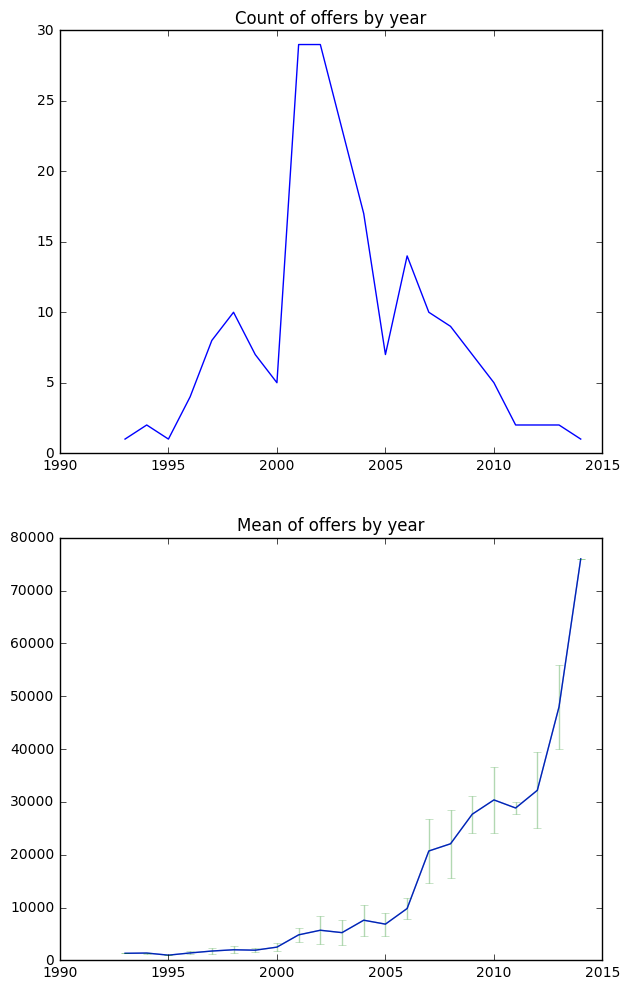

In [115]:
by_year_stats(min_count=1)

Rok | Ilość | Diesel | Ilość | Benzyna | Ilość | LPG
1993 0 0.0 1 1350.0 0 0.0
1994 0 0.0 1 1300.0 1 1500.0
1995 1 1000.0 0 0.0 0 0.0
1996 0 0.0 2 1190.0 2 1649.5
1997 2 1700.0 4 1450.0 2 2525.0
1998 2 2449.5 6 1841.66666667 2 2125.0
1999 5 2100.0 1 1600.0 1 1500.0
2000 4 2774.75 0 0.0 1 1499.0
2001 16 4158.5 7 5612.85714286 6 5766.66666667
2002 20 5315.6 7 6799.85714286 2 5900.0
2003 19 5252.78947368 3 5183.33333333 1 5700.0
2004 10 6390.0 6 9175.0 1 10500.0
2005 7 6871.42857143 0 0.0 0 0.0
2006 13 9853.76923077 0 0.0 1 9500.0
2007 9 19761.1111111 1 29300.0 0 0.0
2008 8 21462.5 1 26990.0 0 0.0
2009 6 26950.0 0 0.0 1 32000.0
2010 3 26033.3333333 1 41900.0 1 31900.0
2011 2 28850.0 0 0.0 0 0.0
2012 2 32200.0 0 0.0 0 0.0
2013 0 0.0 2 47999.5 0 0.0
2014 0 0.0 1 76000.0 0 0.0


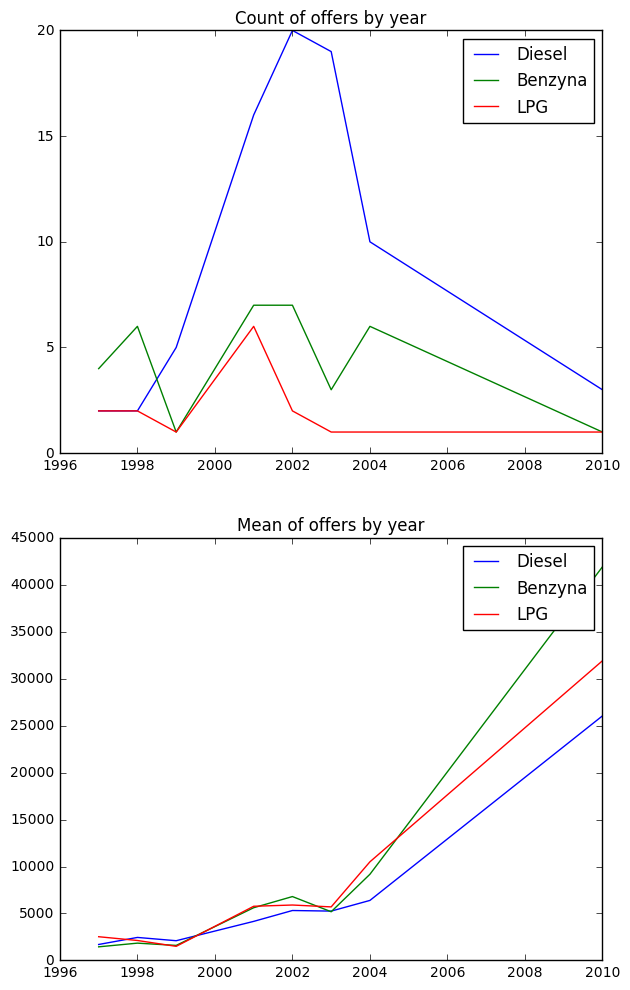

In [116]:
by_year_stats([
    (lambda ofr: ofr['details']['Paliwo'] == 'Diesel'), 
    (lambda ofr: ofr['details']['Paliwo'] == 'Benzyna'), 
    (lambda ofr: ofr['details']['Paliwo'] == 'LPG')
    ], ['Diesel', 'Benzyna', 'LPG'], min_count=1)

Rok | Ilość | Manual | Ilość | Automat
1993 1 1350.0 0 0.0
1994 2 1400.0 0 0.0
1995 1 1000.0 0 0.0
1996 3 1293.33333333 1 1799.0
1997 7 1842.85714286 1 1350.0
1998 10 2019.9 0 0.0
1999 6 2000.0 1 1600.0
2000 5 2519.6 0 0.0
2001 28 4800.92857143 1 6000.0
2002 28 5709.32142857 1 5850.0
2003 21 5302.57142857 2 4849.5
2004 13 7388.46153846 4 8350.0
2005 6 7450.0 1 3400.0
2006 12 10108.25 2 8150.0
2007 10 20715.0 0 0.0
2008 9 22076.6666667 0 0.0
2009 6 27716.6666667 1 27400.0
2010 4 27500.0 1 41900.0
2011 1 30000.0 1 27700.0
2012 2 32200.0 0 0.0
2013 0 0.0 2 47999.5
2014 0 0.0 1 76000.0


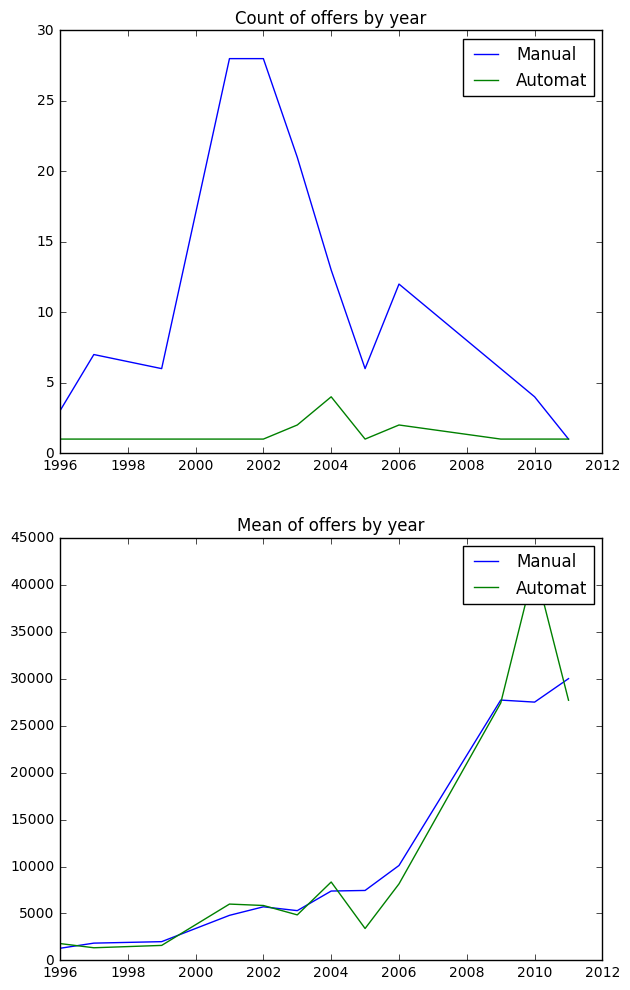

In [117]:
by_year_stats([
    (lambda ofr: ofr['details'][u'Skrzynia biegów'] == 'Manualna'), 
    (lambda ofr: ofr['details'][u'Skrzynia biegów'] == 'Automatyczna')
    ], ['Manual', 'Automat'], min_count=1)

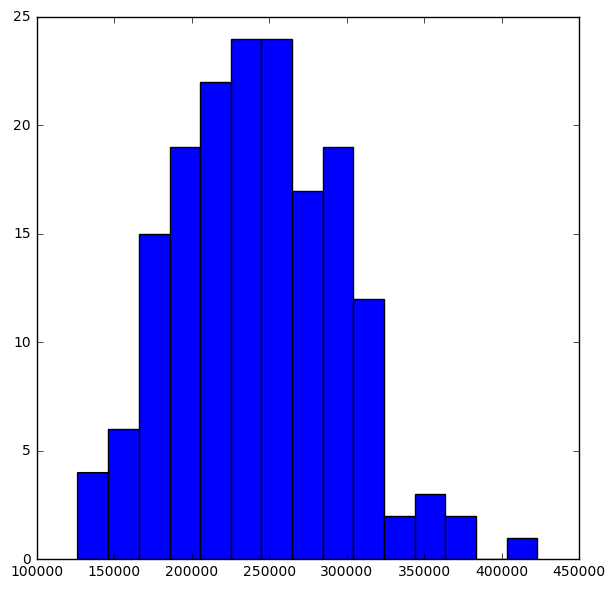

In [13]:
przebiegi = []
for ofr in offrs_dtls:
    przebieg = int(ofr['details']['Przebieg'][:-2].replace(' ',''))
    if przebieg > 100000 and przebieg < 1000000:
        przebiegi += [przebieg]
_ = hist(przebiegi, bins=15)

In [99]:
find_by_type(['details', 'Paliwo'])

LPG: 22
Benzyna: 44
Diesel: 129


In [98]:
find_by_type(['details', u'Skrzynia biegów'])

Automatyczna: 20
Manualna: 175


In [97]:
find_by_type(['details', u'Typ nadwozia'])

Sedan: 25
Hatchback: 40
Kombi: 130


In [96]:
find_by_type(['details', u'Poj. silnika'])

1 986 cm3: 1
2 495 cm3: 1
2 967 cm3: 1
N/A: 1
1 796 cm3: 1
1 789 cm3: 1
1 980 cm3: 1
2 cm3: 1
22 cm3: 1
1 900 cm3: 1
2 506 cm3: 1
1 597 cm3: 1
18 cm3: 1
20 cm3: 1
1 988 cm3: 2
1 999 cm3: 2
1 600 cm3: 2
2 198 cm3: 2
2 500 cm3: 3
2 200 cm3: 3
1 997 cm3: 3
1 753 cm3: 3
1 998 cm3: 29
1 800 cm3: 50
2 000 cm3: 82


In [100]:
find_by_type(['details', u'Oferta od'])

Firmy: 17
Osoby prywatnej: 178


In [103]:
find_by_type(['details', u'Kolor'])

Brązowy – Beżowy: 1
Czerwony: 4
Żółty – Złoty: 8
Biały: 9
Zielony: 16
Szary: 19
Inny kolor: 21
Niebieski: 28
Czarny: 43
Srebrny: 46


In [118]:
find_by_type(['details', u'Stan techniczny'])

Uszkodzony: 14
Nieuszkodzony: 181
